# Recomendar nuevos temas en Spotify
<img src="spotify.png" alt="Drawing" style="width: 100%;height: 400px"/>


## Definición de pregunta o problema
 > El objetivo aquí es poder estimar si un  tema nuevo será del gusto de la persona que tiene esta playlist activa. En este  caso 
 la variable label corresponde a nuestra variable de salida a analizar.

## Objetivos de la ingeniería de features

- **acousticness**: Número [float]  
  Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. Un valor de 1.0 representa alta confianza en que la pista es acústica.  
  **Rango**: 0 - 1

- **danceability**: Número [float]  
  La bailabilidad describe cuán adecuada es una pista para bailar, basada en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0.0 es lo menos bailable y 1.0 es lo más bailable.

- **duration_ms**: Entero [integer]  
  La duración de la pista en milisegundos.

- **energy**: Número [float]  
  La energía es una medida de 0.0 a 1.0 que representa una medida perceptual de intensidad y actividad. Generalmente, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Las características perceptuales que contribuyen a este atributo incluyen el rango dinámico, la sonoridad percibida, el timbre, la frecuencia de inicio y la entropía general.

- **instrumentalness**: Número [float]  
  Predice si una pista no contiene voces. Los sonidos como "Ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor es la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0.5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1.0.

- **key**: Entero [integer]  
  La clave en la que se encuentra la pista. Los enteros se asignan a tonos utilizando la notación estándar de clase de tono. 0 = C (Do), 1 = C♯/D♭ (Do sostenido/Re bemol), 2 = D (Re), 3 = D♯/E♭ (Re sostenido/Mi bemol), 4 = E (Mi), 5 = F (Fa), 6 = F♯/G♭ (Fa sostenido/Sol bemol), 7 = G (Sol), 8 = G♯/A♭ (Sol sostenido/La bemol), 9 = A (La), 10 = A♯/B♭ (La sostenido/Si bemol), 11 = B (Si). -1 indica que no se detectó una clave.  
  **Rango**: -1 - 11

- **liveness**: Número [float]  
  Detecta la presencia de una audiencia en la grabación. Los valores altos de vivacidad representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor superior a 0.8 indica una alta probabilidad de que la pista sea en vivo.

- **loudness**: Número [float]  
  La sonoridad total de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa entre pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicamente oscilan entre -60 y 0 dB.

- **mode**: Entero [integer]  
  Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor por 0.

- **speechiness**: Número [float]  
  La cualidad de habla detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida al habla sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente están compuestas completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como habla, ya sea en secciones o superpuestas, como en el caso del rap. Los valores por debajo de 0.33 representan probablemente música y otras pistas no parecidas al habla.

- **tempo**: Número [float]  
  El tempo general estimado de una pista en pulsos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración promedio del pulso.

- **time_signature**: Entero [integer]  
  Una firma de tiempo estimada. La firma de tiempo (metro) es una convención notacional que especifica cuántos tiempos hay en cada compás. La firma de tiempo varía de 3 a 7, indicando firmas de tiempo de "3/4" a "7/4". 3 representa un compás de 3/4 (valses y baladas), 4 es 4/4 (el más común en pop y rock), 5 es 5/4 (jazz y experimental), 6 es 6/4 o 6/8 (baladas y piezas clásicas) y 7 es 7/4 (progresivo y complejo).   
  **Rango**: 3 - 7 (El nuestro va de 1 a 5)

- **valence**: Número [float]  
  Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

- **label**: Entero [integer]  
  Indica si una canción es del gusto de la persona que escucha esta playlist. Un valor de **1** significa que la canción le gusta a la persona, mientras que un valor de **0** indica que no le gusta.
ar

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


---
## Adquirir datos de entrenamiento y pruebas.
---

#### Separámos los datos de entrenamiento y testeo primero

In [11]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset/data_playlist.csv")

X = df.iloc[:, :-1]  # Características (input)
y = df.iloc[:, -1]   # Etiquetas o target (output)

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
X_train

acousticness  danceability  duration  energy  instrumentalness  key  \
382      0.713000         0.606    244027  0.4570          0.000025    6   
407      0.000378         0.788    270545  0.6960          0.087000    7   
235      0.652000         0.627    219040  0.1320          0.000000    0   
456      0.583000         0.549    212307  0.6510          0.000000    0   
209      0.859000         0.373    268000  0.0979          0.000000    1   
..            ...           ...       ...     ...               ...  ...   
71       0.009100         0.405    220333  0.7600          0.000000    7   
106      0.004640         0.321    189480  0.9550          0.008970   10   
270      0.232000         0.675    123079  0.6670          0.000000    0   
435      0.066200         0.715    184918  0.6870          0.000000    8   
102      0.586000         0.565    238933  0.4610          0.000000    0   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  
382    0.0747   -14.035     0       0.0497   92.033               4    0.813  
407    0.0754    -4.512     1       0.0417  109.981               4    0.259  
235    0.4300   -13.357     1       0.7210  167.127               4    0.256  
456    0.1210    -7.097     1       0.0323  122.818               4    0.368  
209    0.0554   -19.385     1       0.0484  148.563               4    0.173  
..        ...       ...   ...          ...      ...             ...      ...  
71     0.3750    -4.863     1       0.0407  109.875               4    0.317  
106    0.2690    -2.749     0       0.1460  167.467               4    0.331  
270    0.0813    -7.009     1       0.0785  141.943               4    0.493  
435    0.0663    -6.277     1       0.3120  177.032               4    0.697  
102    0.1620    -7.273     1       0.1410  157.894               4    0.199  

[525 rows x 13 columns]

---
---

- Observamos las primeras 5 filas del set de datos.

---

In [18]:
X_train.head(5)

acousticness  danceability  duration  energy  instrumentalness  key  \
382      0.713000         0.606    244027  0.4570          0.000025    6   
407      0.000378         0.788    270545  0.6960          0.087000    7   
235      0.652000         0.627    219040  0.1320          0.000000    0   
456      0.583000         0.549    212307  0.6510          0.000000    0   
209      0.859000         0.373    268000  0.0979          0.000000    1   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  
382    0.0747   -14.035     0       0.0497   92.033               4    0.813  
407    0.0754    -4.512     1       0.0417  109.981               4    0.259  
235    0.4300   -13.357     1       0.7210  167.127               4    0.256  
456    0.1210    -7.097     1       0.0323  122.818               4    0.368  
209    0.0554   -19.385     1       0.0484  148.563               4    0.173

---
---

-  Muestra los valores mínimos y máximos de cada columna en el DataFrame.

---

In [21]:
min_max_values = X_train.agg(['min', 'max'])
print(tabulate(min_max_values, headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════════╤════════════════╤════════════╤══════════╤════════════════════╤═══════╤════════════╤════════════╤════════╤═══════════════╤═════════╤══════════════════╤═══════════╕
│     │   acousticness │   danceability │   duration │   energy │   instrumentalness │   key │   liveness │   loudness │   mode │   speechiness │   tempo │   time_signature │   valence │
╞═════╪════════════════╪════════════════╪════════════╪══════════╪════════════════════╪═══════╪════════════╪════════════╪════════╪═══════════════╪═════════╪══════════════════╪═══════════╡
│ min │       1.17e-06 │          0.135 │      33840 │  0.00925 │              0     │     0 │      0.024 │    -28.841 │      0 │        0.0237 │  55.747 │                1 │    0.0332 │
├─────┼────────────────┼────────────────┼────────────┼──────────┼────────────────────┼───────┼────────────┼────────────┼────────┼───────────────┼─────────┼──────────────────┼───────────┤
│ max │       0.994    │          0.986 │     675360 │  0.995   │

In [23]:
type(min_max_values)

pandas.core.frame.DataFrame

---
---

- Descripción de cada columna e información general del dataframe. 

---

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 382 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      525 non-null    float64
 1   danceability      525 non-null    float64
 2   duration          525 non-null    int64  
 3   energy            525 non-null    float64
 4   instrumentalness  525 non-null    float64
 5   key               525 non-null    int64  
 6   liveness          525 non-null    float64
 7   loudness          525 non-null    float64
 8   mode              525 non-null    int64  
 9   speechiness       525 non-null    float64
 10  tempo             525 non-null    float64
 11  time_signature    525 non-null    int64  
 12  valence           525 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 57.4 KB


---
-  Observamos si el dataset tiene valores nulos


In [29]:
X_train.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64



-  El dataframe esta completo sin valores nulos (null)

---


-  Observamos si el dataset tiene valores con guiones


In [33]:
tienen_guion = X_train.astype('str').eq('-').any(axis=0)
tienen_guion

acousticness        False
danceability        False
duration            False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool



-  El dataframe no contiene guiones

---

---
-  Descripcion estadistica general


In [39]:
X_train.describe()

acousticness  danceability       duration      energy  \
count    525.000000    525.000000     525.000000  525.000000   
mean       0.362697      0.597331  220059.678095    0.586747   
std        0.341284      0.171891   67639.507074    0.254140   
min        0.000001      0.135000   33840.000000    0.009250   
25%        0.043500      0.477000  184693.000000    0.416000   
50%        0.232000      0.606000  215160.000000    0.621000   
75%        0.695000      0.714000  245387.000000    0.790000   
max        0.994000      0.986000  675360.000000    0.995000   

       instrumentalness         key    liveness    loudness        mode  \
count        525.000000  525.000000  525.000000  525.000000  525.000000   
mean           0.104097    4.740952    0.199054   -8.526710    0.739048   
std            0.265518    3.630019    0.172096    5.146459    0.439573   
min            0.000000    0.000000    0.024000  -28.841000    0.000000   
25%            0.000000    1.000000    0.093200  -10.013000    0.000000   
50%            0.000007    5.000000    0.127000   -7.273000    1.000000   
75%            0.002570    8.000000    0.249000   -5.157000    1.000000   
max            0.967000   11.000000    0.979000   -0.913000    1.000000   

       speechiness       tempo  time_signature     valence  
count   525.000000  525.000000      525.000000  525.000000  
mean      0.098748  120.752286        3.895238    0.498867  
std       0.103539   28.037121        0.398562    0.240699  
min       0.023700   55.747000        1.000000    0.033200  
25%       0.035800   99.165000        4.000000    0.302000  
50%       0.049000  121.041000        4.000000    0.492000  
75%       0.113000  139.695000        4.000000    0.685000  
max       0.721000  204.162000        5.000000    0.975000

In [43]:
# Corroboramos si tenemos columnas de tipo Object.


if not X_train.select_dtypes(include=['object']).empty:
    summary = X_train.describe(include=['O'])
    print(summary)
else:
    print("No hay columnas de tipo 'object' en el DataFrame.")

No hay columnas de tipo 'object' en el DataFrame.


---
-  Creacion de un indice para identificar las observaciones


In [46]:
X_train.index = range(1, len(X_train) + 1)
X_train.index.name = 'song'

In [50]:
# Usando pandas profiling
report = ProfileReport(X_train, title='Spotify Songs', minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Graficos

### Graficos de relaciones

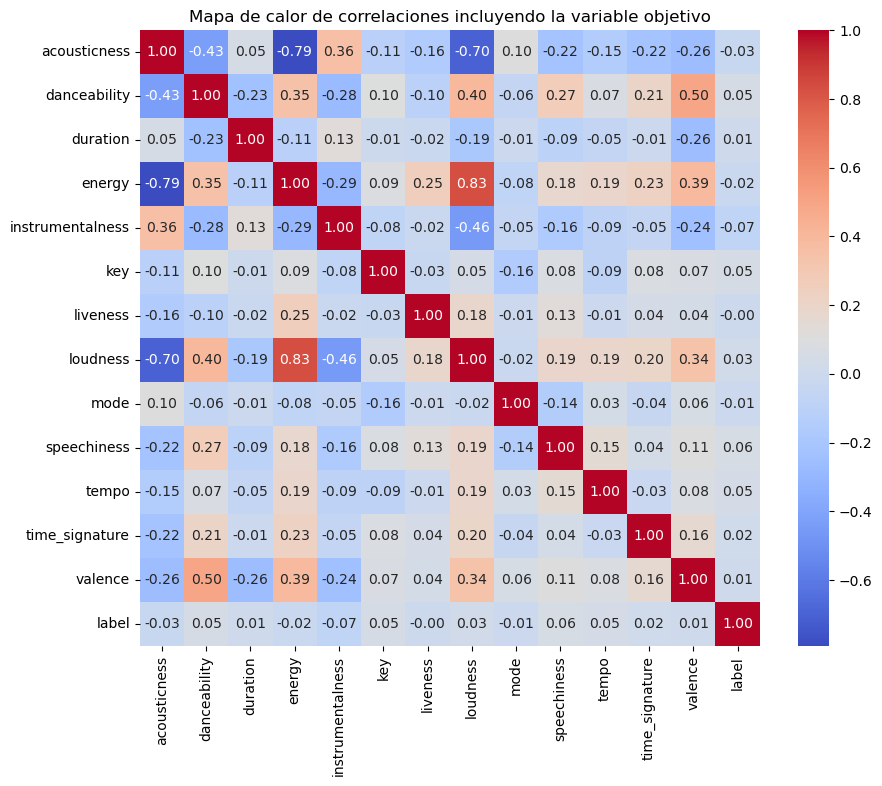

In [62]:
# Combinar X_train y y_train en un solo DataFrame
data_with_target = X_train.copy()  # Copia X_train para evitar modificar el original
data_with_target['label'] = y_train  # Añade y_train como una nueva columna

# Crear la figura para el gráfico
plt.figure(figsize=(10, 8), dpi=100)

# Generar el heatmap con la matriz de correlación
sns.heatmap(data_with_target.corr(), cmap="coolwarm", annot=True, fmt=".2f")

# Añadir un título al gráfico
plt.title("Mapa de calor de correlaciones incluyendo la variable objetivo")
plt.show()


#### Conclusiones al ver el grafico de correlaciones

#### Correlaciones Negativas Fuertes
- **acousticness y energy (-0.79)**: Las canciones con alta *acousticness* tienden a tener menos *energy*, lo cual es típico en música acústica, que suele ser más suave e intensa.
- **energy y acousticness (-0.79)**: La música enérgica es menos acústica, frecuentemente más orientada hacia producciones electrónicas o de alta intensidad.

#### Correlaciones Positivas Fuertes
- **energy y loudness (0.83)**: La energía de una canción está fuertemente relacionada con su volumen, dado que ambos atributos contribuyen a la percepción de intensidad.
- **loudness y energy (0.83)**: Similarmente, canciones con alto volumen suelen ser enérgicas.

#### Correlaciones Negativas Moderadas
- **acousticness y loudness (-0.70)**: Las canciones acústicas tienden a ser menos fuertes en volumen, acorde a la naturaleza de este estilo.
- **acousticness y danceability (-0.43)**: Las canciones acústicas tienden a ser menos bailables, ya que suelen carecer de ritmos repetitivos y marcados.
- **danceability y acousticness (-0.43)**: La música bailable es menos acústica, frecuentemente con una mayor presencia de elementos electrónicos.
  
#### Correlaciones Positivas Moderadas
- **danceability y valence (0.50)**: Las canciones bailables suelen tener un tono positivo, típico en géneros como pop y dance.
- **valence y danceability (0.50)**: La positividad en una canción está asociada con su bailabilidad.
- **danceability con loudness (0.40) y energy (0.35)**: Canciones con ritmo bailable tienden a ser más fuertes y enérgicas.
- **energy y valence (0.39)**: Las canciones enérgicas suenan más positivas, un patrón común en géneros de alta energía.

#### Correlaciones Bajas
- **instrumentalness y acousticness (0.36)**: Las canciones instrumentales suelen ser ligeramente más acústicas.
- **loudness y valence (0.34)**: Canciones fuertes tienden a sonar más positivas.
- **speechiness y danceability (0.27)**: La presencia de palabras habladas está débilmente asociada con la bailabilidad.

#### Correlaciones Muy Bajas o Sin Correlación
- **duration, key, liveness, mode, speechiness, tempo y time_signature**: Estas características muestran correlaciones muy bajas con otras variables, indicando que son más independientes y no afectan significativamente atributos como la energía, la bailabilidad o el volumen de la música.


---

## Gráficos con variables continuas, tiempo considerado como continuo

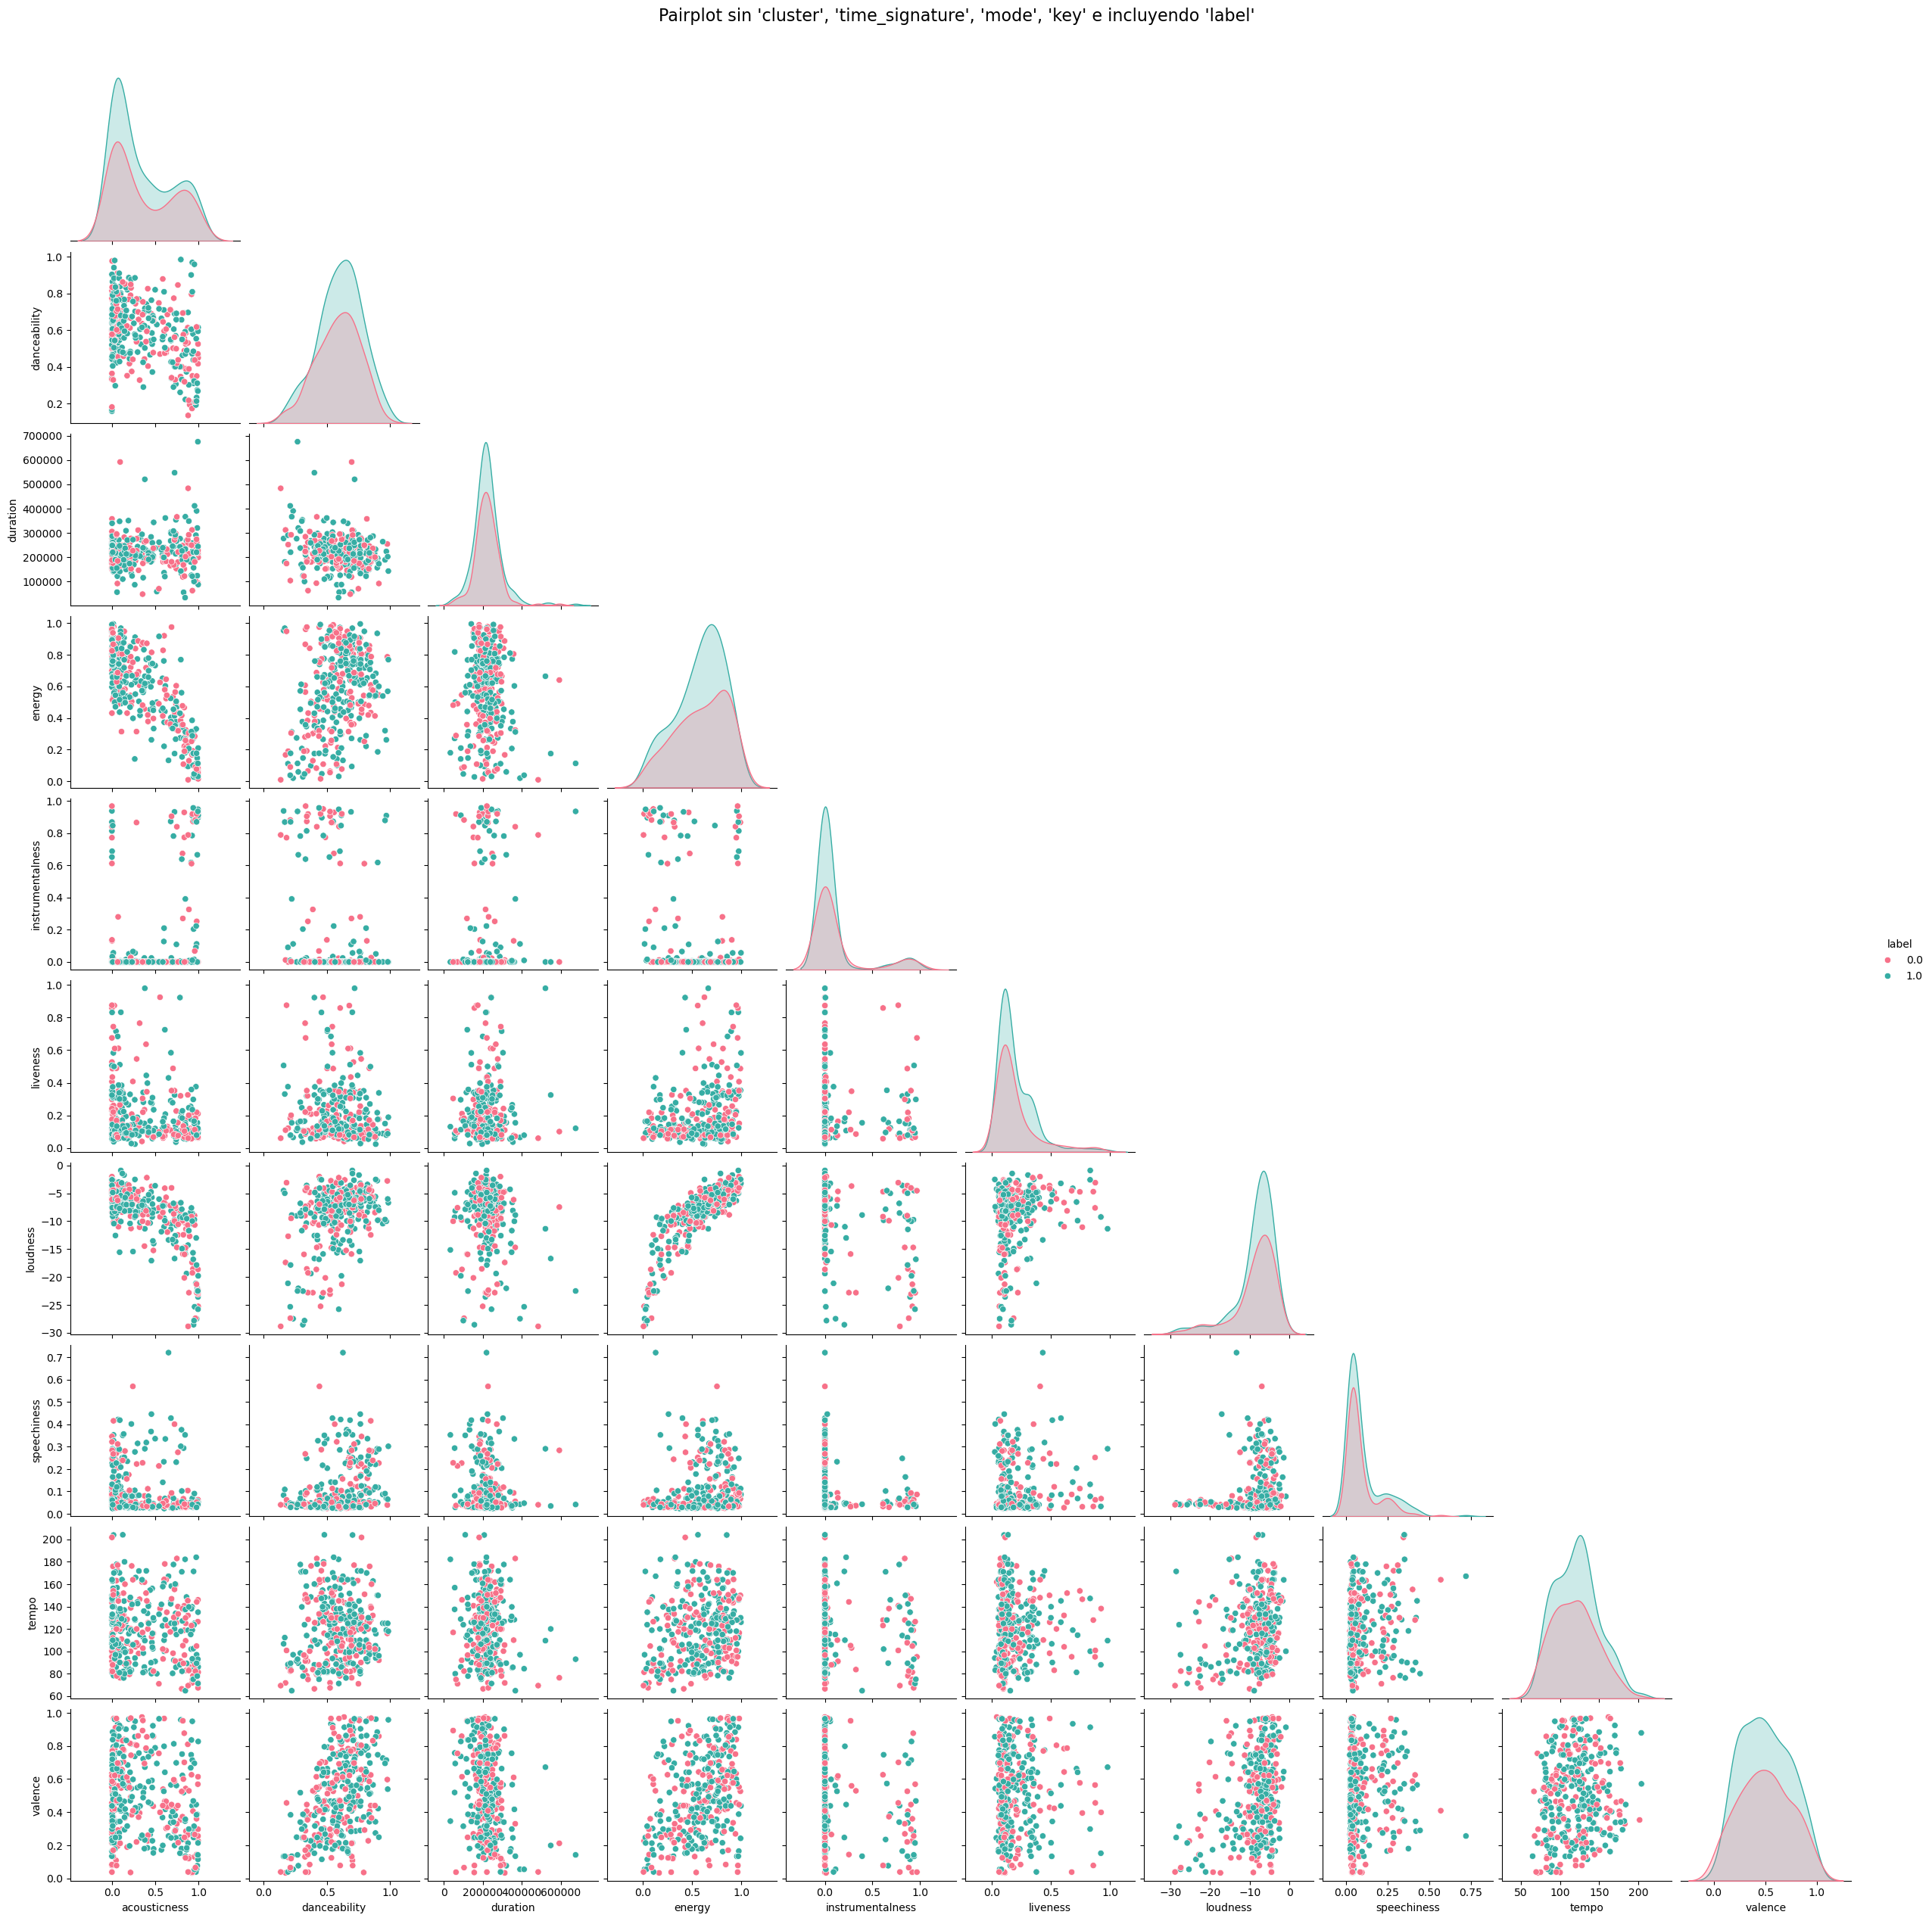

In [68]:
#Graficos con variables continuas, tiempo considerado como continuo


# Crear un nuevo DataFrame excluyendo las columnas no deseadas
variables_a_excluir = ['time_signature', 'mode', 'key']
X_train_sin_columnas = X_train.drop(columns=variables_a_excluir, errors='ignore')

# Añadir y_train como una columna llamada 'label'
X_train_sin_columnas['label'] = y_train

# Crear pairplot con la variable 'label' como hue
sns.pairplot(X_train_sin_columnas, hue='label', diag_kind="kde", palette="husl", corner=True)

# Ajustar el título general del gráfico
plt.suptitle("Pairplot sin 'time_signature', 'mode', 'key' e incluyendo 'label'", y=1.02, fontsize=16)

# Mostrar el gráfico
plt.show()

#### Distribuciones en las Diagonales (Histogramas/Densidad)
Conclusiones de diagonales del pairplot, distribuciones univariadas (KDE o histogramas) para cada característica:

**acousticness**:
- Las canciones con `label=1` (gustan al usuario, en verde) tienden a tener valores más altos en *acousticness* en comparación con las canciones con `label=0` (no gustan, en rojo).
- Esto indica que al usuario le gustan más las canciones acústicas.

**danceability**:
- Las distribuciones son más homogéneas, pero las canciones con `label=1` están ligeramente sesgadas hacia valores más altos, sugiriendo que las canciones bailables son preferidas.

**duration**:
- La duración no parece ser un factor determinante, ya que las distribuciones son similares para ambos valores de `label`.

**energy**:
- Las canciones con `label=0` tienen mayor frecuencia en valores altos de *energy*, mientras que las canciones con `label=1` se concentran más en valores medios-bajos.
- Esto sugiere que al usuario le gustan canciones menos enérgicas.

**instrumentalness**:
- Las canciones con valores más altos en *instrumentalness* tienen mayor probabilidad de estar asociadas con `label=1`, lo que indica que las canciones instrumentales son más del agrado del usuario.

**valence**:
- La positividad (*valence*) de las canciones no muestra diferencias claras entre `label=0` y `label=1`, aunque las canciones con `label=1` tienen una ligera preferencia por valores medios.

#### Relaciones Bivariadas (graficos de dispersion)
Los gráficos fuera de la diagonal muestran cómo se relacionan las características entre sí y cómo se agrupan según `label`:

**acousticness vs energy**:
- Hay una correlación negativa clara: canciones con alta *acousticness* tienden a tener baja *energy*.
- Las canciones con `label=1` están más concentradas en el extremo alto de *acousticness* y bajo de *energy*, reforzando la preferencia por canciones tranquilas y acústicas.

**danceability vs valence**:
- Canciones con mayor *danceability* tienden a tener mayor *valence* (positividad).
- Canciones con `label=1` parecen preferir una combinación de *danceability* moderada y *valence* medio.

**instrumentalness vs duration**:
- Las canciones con valores altos en *instrumentalness* tienden a tener duraciones más largas, y muchas de ellas tienen `label=1`, indicando una preferencia por canciones instrumentales y extendidas.

**loudness vs energy**:
- Existe una correlación positiva fuerte entre *loudness* y *energy*, lo cual es esperado.
- Las canciones con `label=1` se agrupan más en valores bajos de *loudness* y *energy*, indicando que el usuario prefiere canciones menos ruidosas e intensas.

**tempo vs danceability**:
- No hay una relación fuerte aparente entre *tempo* y *danceability*.
- Sin embargo, las canciones con `label=1` parecen preferir valores intermedios de *tempo*.

#### Relacion con label (gusto del usuario)
Con base en el análisis:

- **Al usuario le gustan más las canciones acústicas y tranquilas:**
  - *High acousticness* y *low energy* son características predominantes en las canciones con `label=1`.

- **Preferencia por canciones instrumentales:**
  - Canciones con altos valores de *instrumentalness* tienen una mayor probabilidad de gustarle al usuario.

- **Gusto moderado por la bailabilidad:**
  - Canciones con *danceability* en rangos medios a altos son preferidas.

- **Menor interés en canciones intensas:**
  - Canciones con alta *energy* y *loudness* suelen estar asociadas con `label=0`, indicando que no son del agrado del usuario.

#### 4. Observaciones Adicionales
- No parece haber una relación directa entre la duración de las canciones y el gusto del usuario.
- La variable *valence* (positividad) no es un diferenciador claro entre canciones que le gustan o no al usuario.


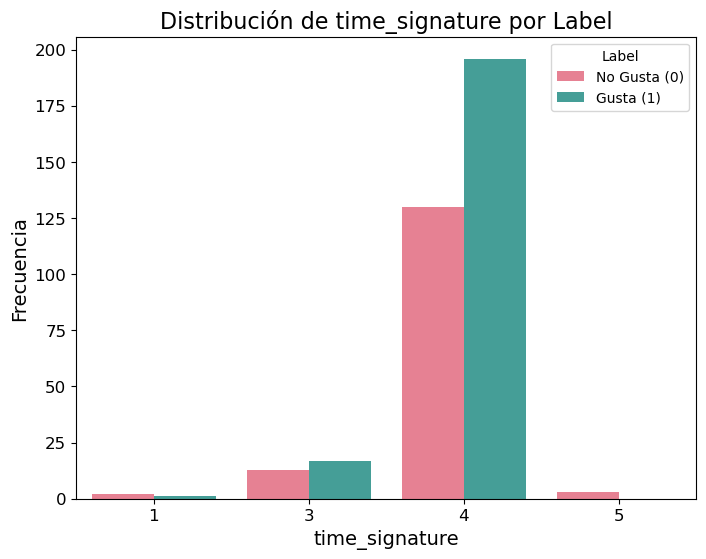

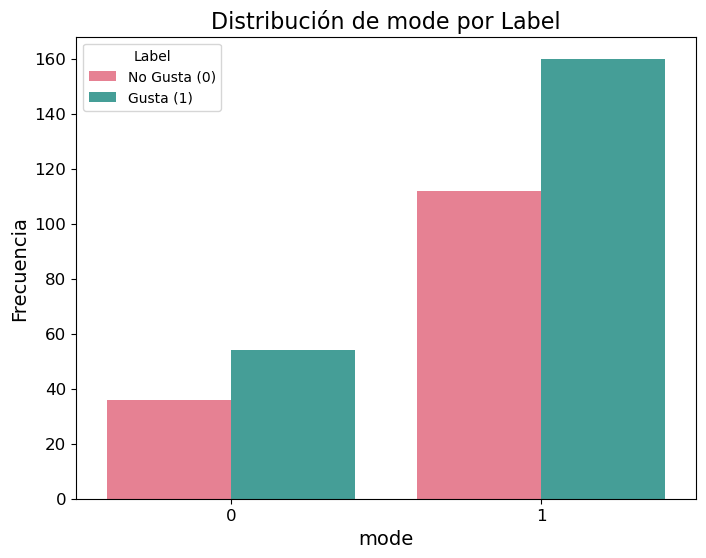

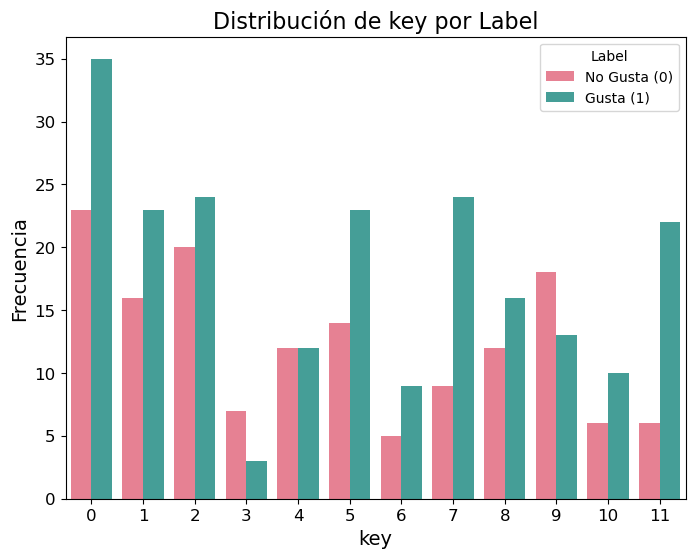

In [74]:

# Variables discretas conocidas
variables_discretas = ['time_signature', 'mode', 'key']

X_train_con_label = X_train

X_train_con_label['label'] = y_train

# Graficar distribuciones para cada variable discreta
for var in variables_discretas:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=X_train_con_label, x=var, hue='label', palette="husl")
    plt.title(f"Distribución de {var} por Label", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.legend(title='Label', labels=['No Gusta (0)', 'Gusta (1)'])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


#### Gráficos de Variables Discretas, Conclusiones:

**1. Cluster**
- La categoría del `cluster` tiene tres valores: 0, 1, y 2.
- Las canciones con `cluster=1` son las que más gustan (`label=1`), mientras que las de `cluster=0` son las que menos gustan (`label=0`).
- Esto sugiere que el `cluster` puede ser un buen diferenciador de preferencias musicales.

**2. Time Signature**
- La mayoría de las canciones tienen un `time_signature=4`, y estas son las que más gustan (`label=1`).
- Los `time_signature=3` y `time_signature=5` también tienen una pequeña representación, pero son menos preferidos.
- Esto refuerza que la mayoría de las canciones populares siguen un compás estándar.

**3. Mode**
- Las canciones en `mode=1` (es decir, en modo mayor) gustan significativamente más al usuario (`label=1`), en comparación con las canciones en `mode=0` (modo menor).
- Esto coincide con la tendencia de que el modo mayor suele transmitir emociones más positivas.

**4. Key**
- La tonalidad (`key`) muestra una amplia distribución.
- Las canciones con tonalidades como `key=0` (C), `key=2` (D), y `key=9` (A) son las más preferidas (`label=1`).
- Otras tonalidades, como `key=3` y `key=10`, tienen menos canciones favoritas.

#### Observaciones Generales
- El `cluster` y el `mode` parecen ser los atributos más influyentes para determinar las canciones que gustan al usuario.
- El `time_signature` estándar (4/4) es una constante en las canciones preferidas, lo que podría indicar que el ritmo juega un papel importante en las preferencias.
- Aunque la tonalidad (`key`) tiene una distribución amplia, algunas tonalidades específicas parecen destacar entre las canciones que gustan.

En general, estos gráficos ofrecen una visión clara de cómo las variables discretas se relacionan con las preferencias del usuario (`label`), lo que puede ser útil para construir modelos predictivos o sistemas de recomendación.


## Analisis de las variables

In [79]:
#clasificar en 2 los gustos 

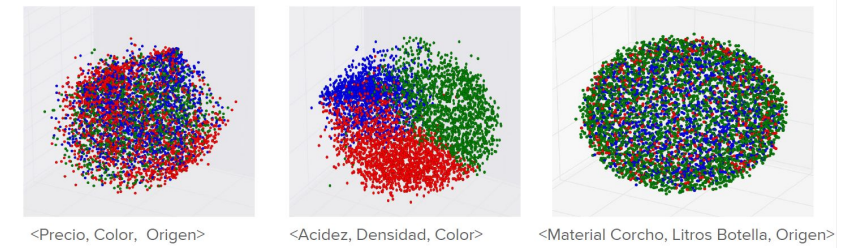

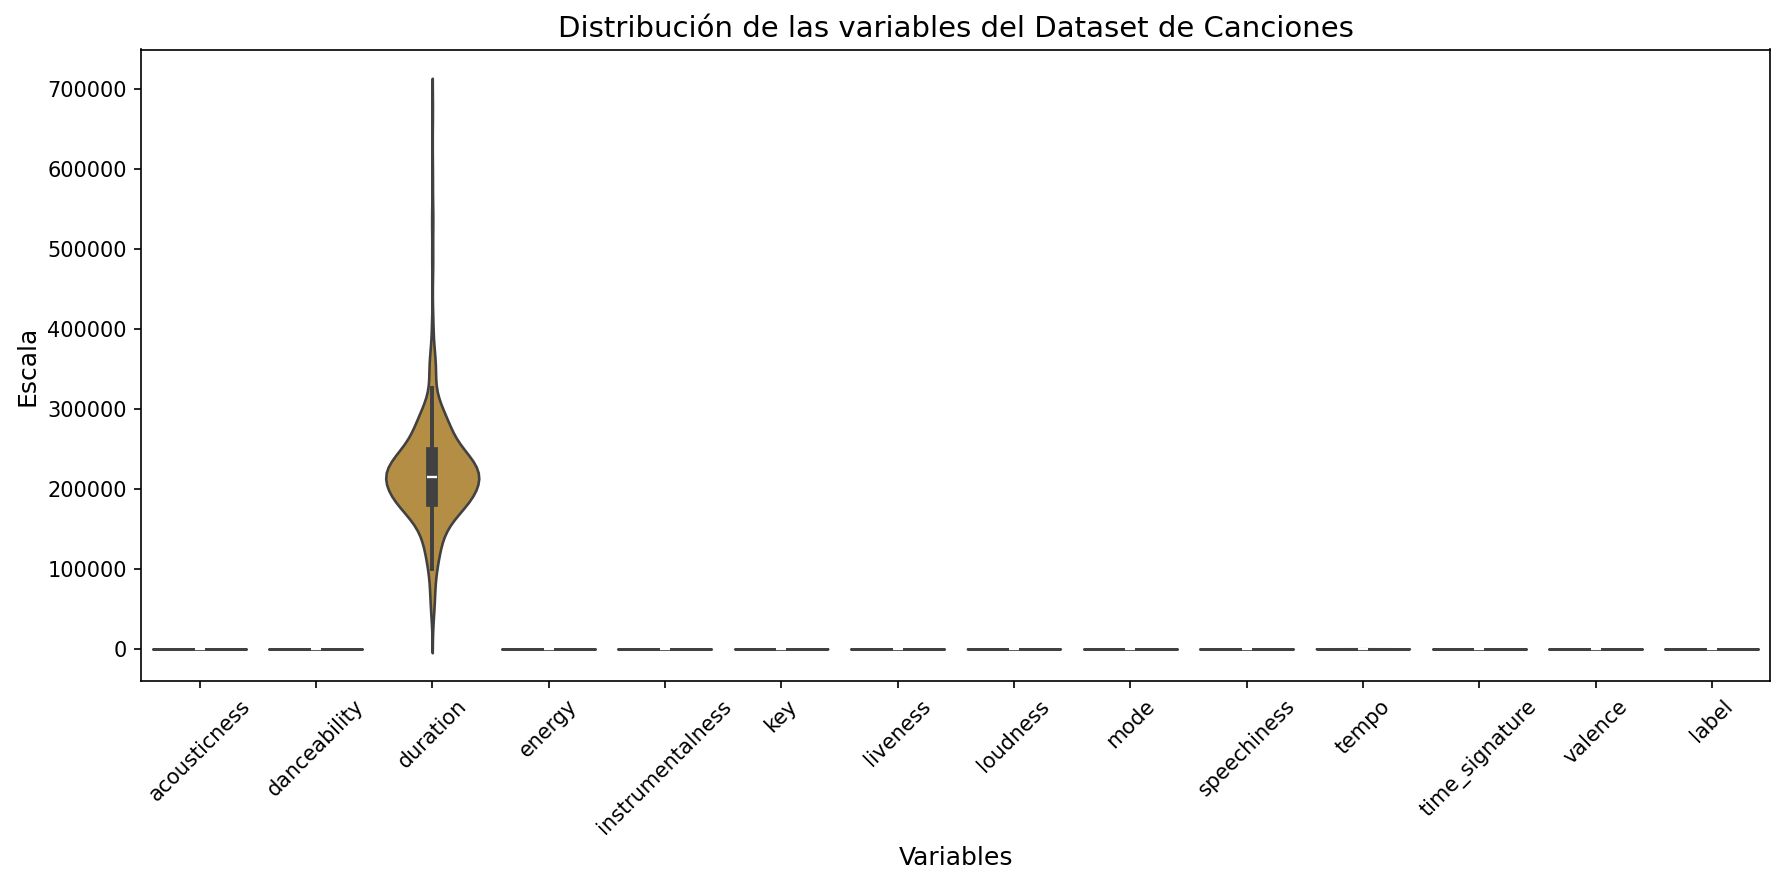

In [77]:
import sea born as sns
import matplotlib.pyplot as plt

# Crear un gráfico de violín para las variables del dataset de canciones
plt.figure(figsize=(12, 6), dpi=150)
sns.violinplot(data=X_train.select_dtypes(include=['float64', 'int64']))
plt.ylabel("Escala", fontsize=12)
plt.xlabel("Variables", fontsize=12)
plt.title("Distribución de las variables del Dataset de Canciones", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


La duration esta fuera de escala comparada con el resto de variables. Es un problema que hay que solucionar

## Escalado

Se prueba el metodo de elbow con las varibles escaladas para 

### k - means

K means es muy utilizado para problemas de recomendaciones. Se prueba con 6 clusters respaldado con el metodo elbow en 2 dimensiones y luego lo mismo pero en 3 dimesiones

C:\Users\Chelo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


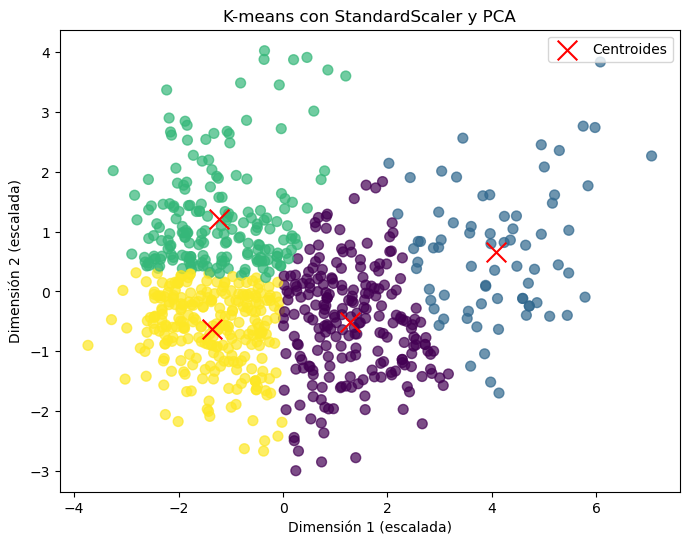

In [103]:
# Estándarizar las variables del dataset
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
songs_PCA_standard = pca.fit_transform(X_standard_scaled)

# Aplicar K-Means con variables escaladas
n_clusters = 4  # Cambiar si es necesario
kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
clusters_standard = kmeans_standard.fit_predict(songs_PCA_standard)

# Visualización de los clusters en las dos dimensiones principales
plt.figure(figsize=(8, 6))
plt.scatter(songs_PCA_standard[:, 0], songs_PCA_standard[:, 1], c=clusters_standard, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_standard.cluster_centers_[:, 0], kmeans_standard.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroides')
plt.title('K-means con StandardScaler y PCA')
plt.xlabel('Dimensión 1 (escalada)')
plt.ylabel('Dimensión 2 (escalada)')
plt.legend()
plt.show()


C:\Users\Chelo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Chelo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Chelo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Chelo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

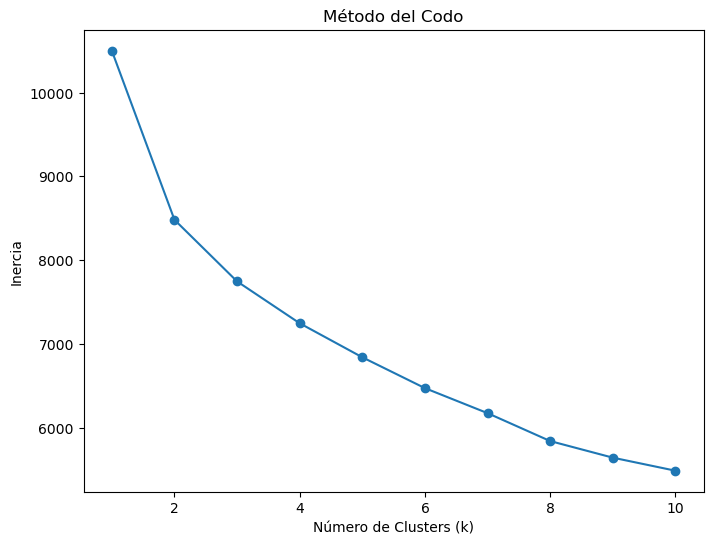

In [105]:
inercias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_standard_scaled)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.show()

### Min Max Escaler

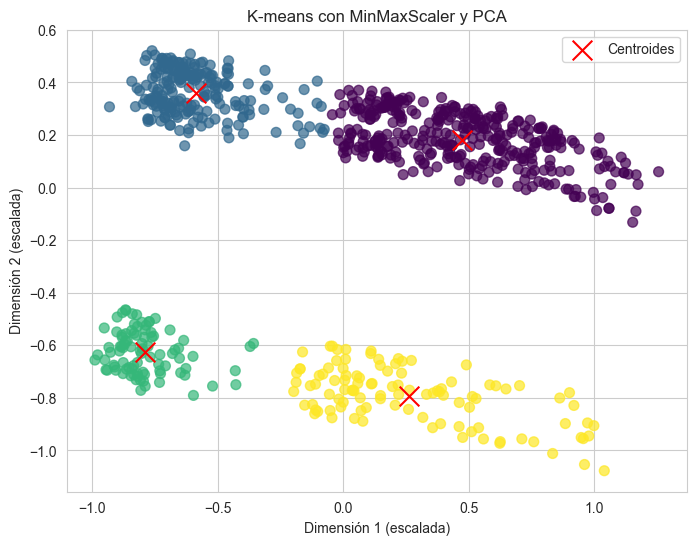

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escalar los datos usando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))

# Reducción de dimensionalidad con PCA a 2 dimensiones
pca = PCA(n_components=2)
songs_PCA_minmax = pca.fit_transform(X_minmax_scaled)

# Aplicar K-Means con variables escaladas (MinMaxScaler)
n_clusters = 4  # Cambiar si es necesario
kmeans_minmax = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
clusters_minmax = kmeans_minmax.fit_predict(songs_PCA_minmax)

# Visualización de los clusters con MinMaxScaler
plt.figure(figsize=(8, 6))
plt.scatter(songs_PCA_minmax[:, 0], songs_PCA_minmax[:, 1], c=clusters_minmax, cmap='viridis', alpha=0.7, s=50)
plt.scatter(kmeans_minmax.cluster_centers_[:, 0], kmeans_minmax.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroides')
plt.title('K-means con MinMaxScaler y PCA')
plt.xlabel('Dimensión 1 (escalada)')
plt.ylabel('Dimensión 2 (escalada)')
plt.legend()
plt.show()


In [138]:
# Con StandardScaler
silhouette_standard = silhouette_score(songs_PCA_standard, clusters_standard)

# Con MinMaxScaler
silhouette_minmax = silhouette_score(songs_PCA_minmax, clusters_minmax)

# Resultados
print(f'Silhouette score con StandardScaler: {silhouette_standard}')
print(f'Silhouette score con MinMaxScaler: {silhouette_minmax}')

Silhouette score con StandardScaler: 0.3494189157523192
Silhouette score con MinMaxScaler: 0.6516599943515335


## Deteccion de outliers

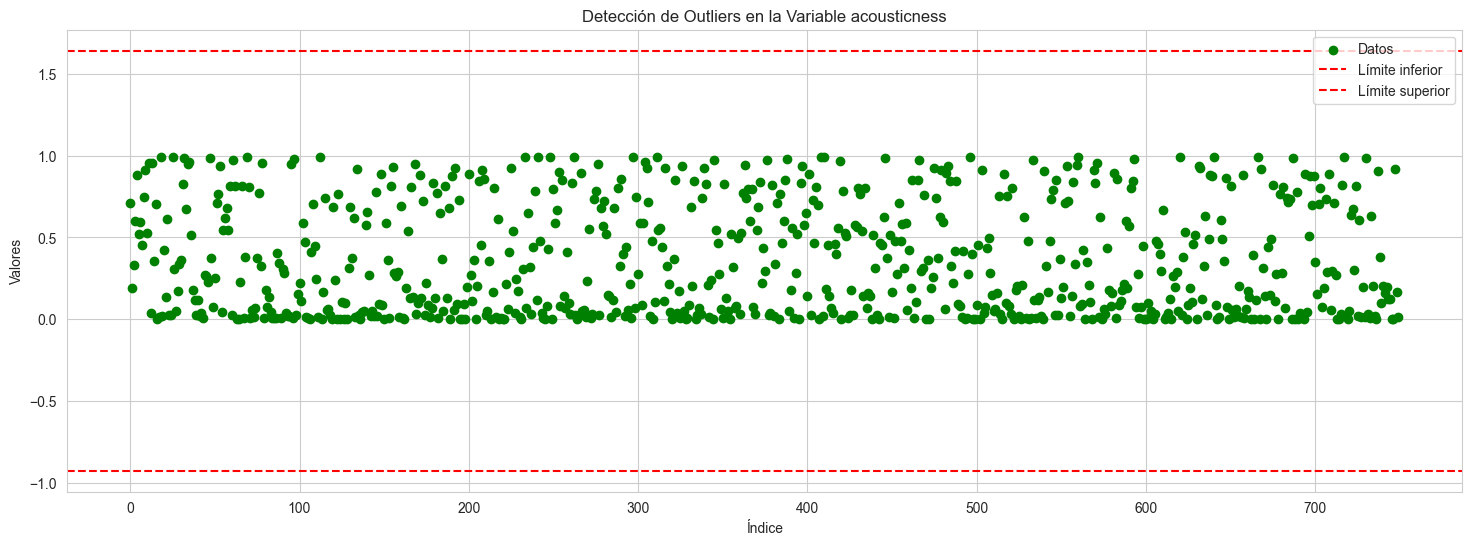

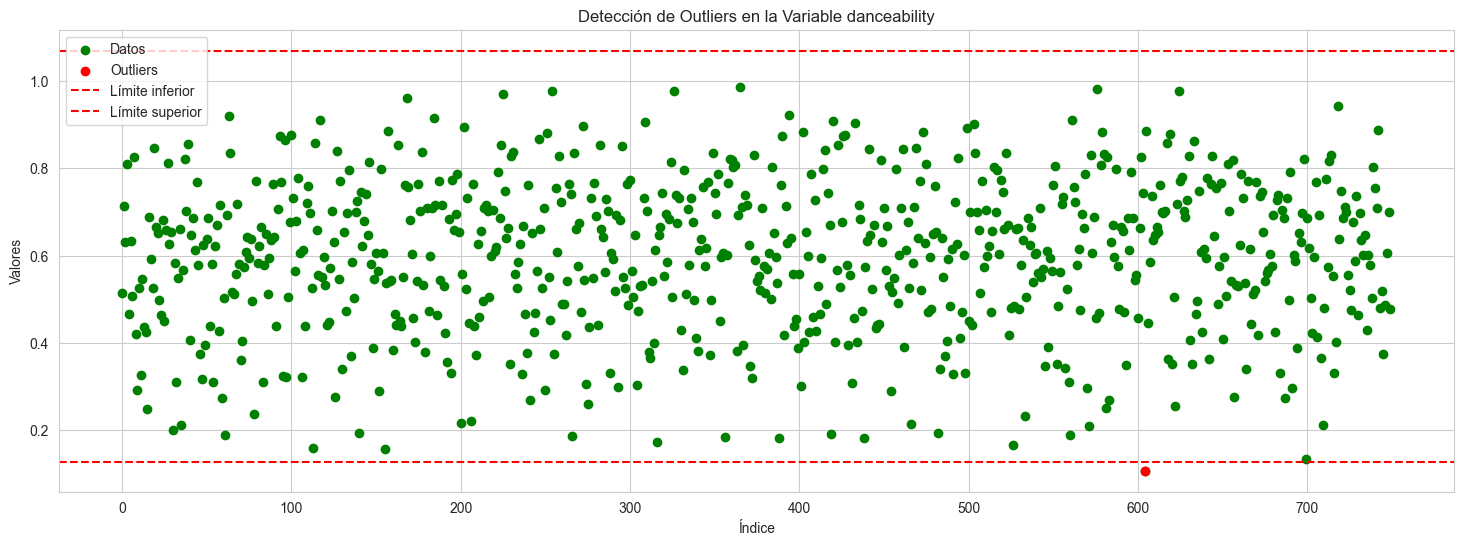

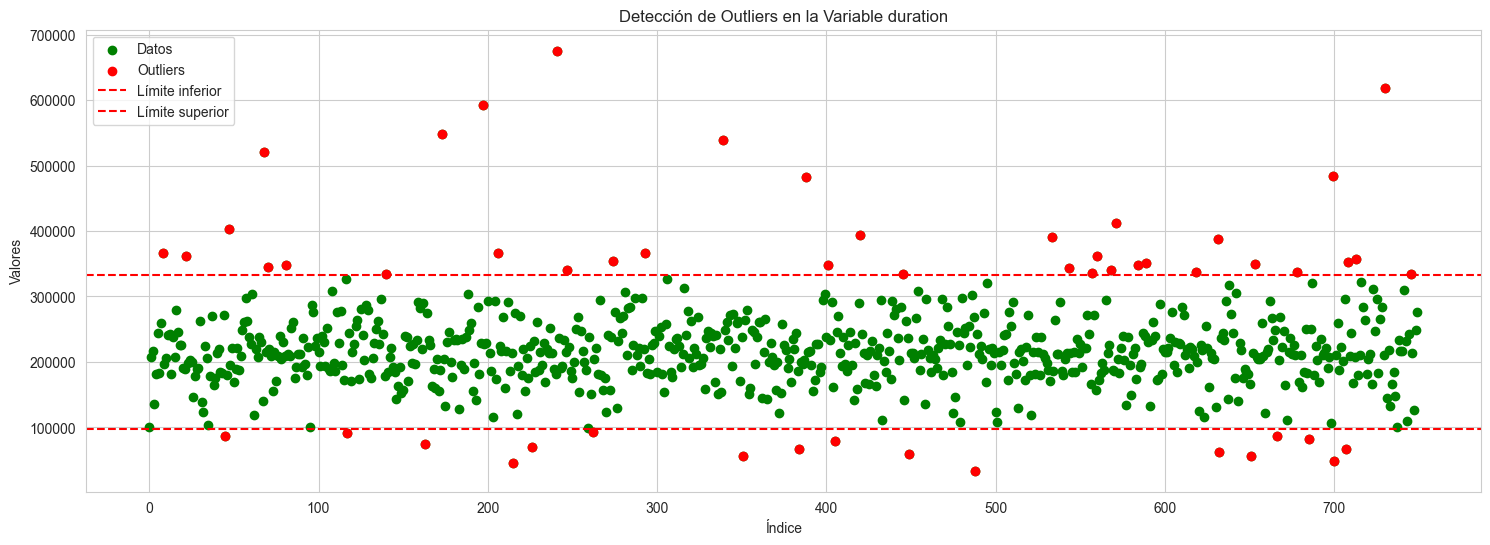

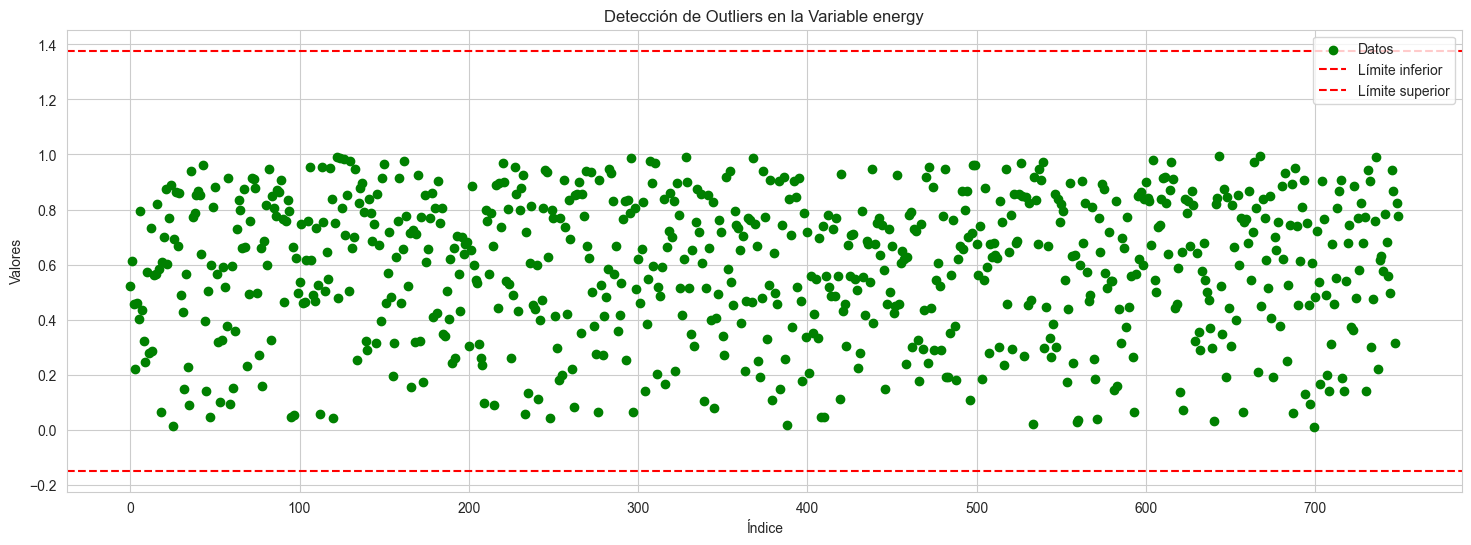

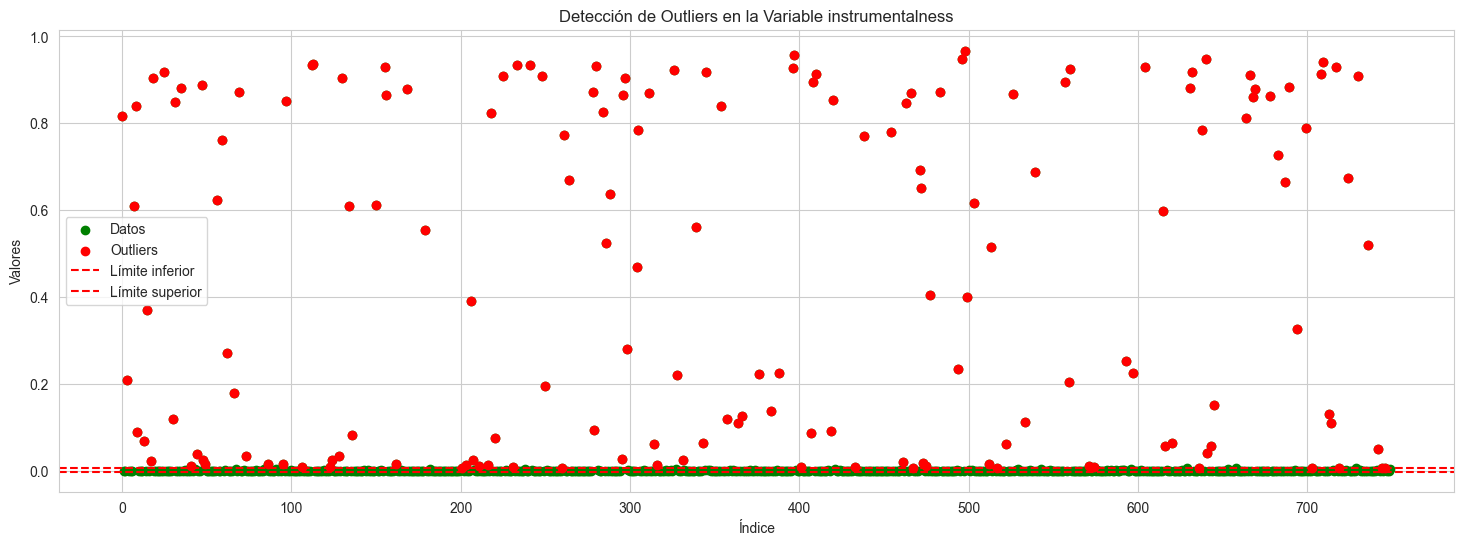

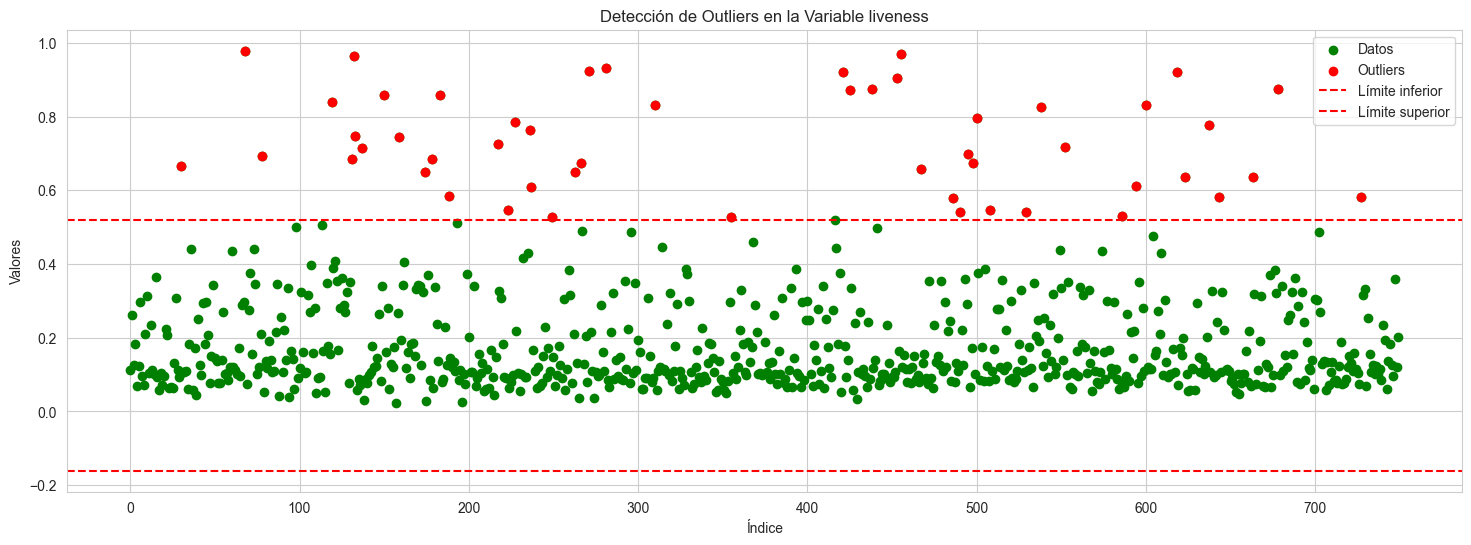

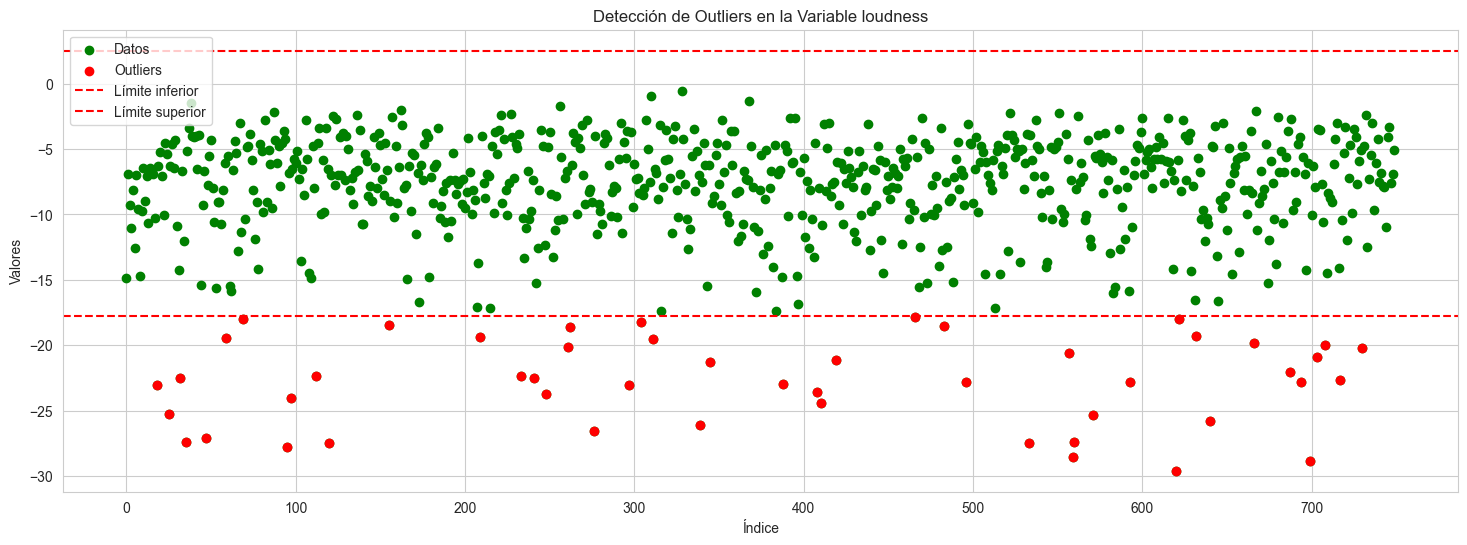

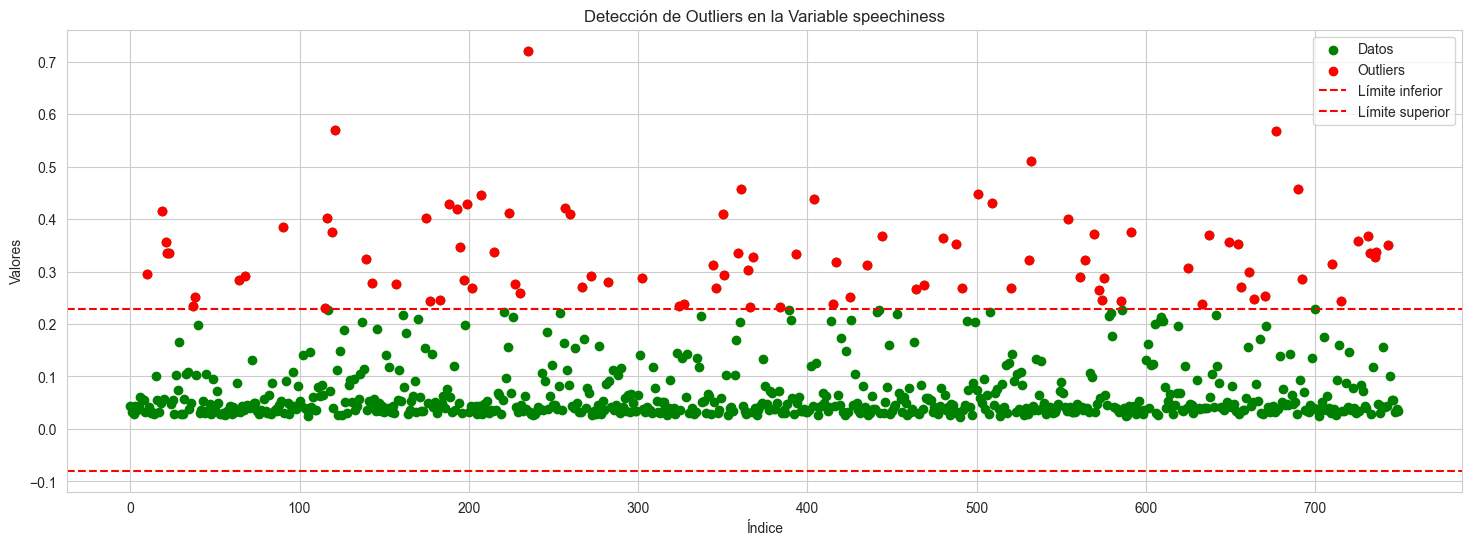

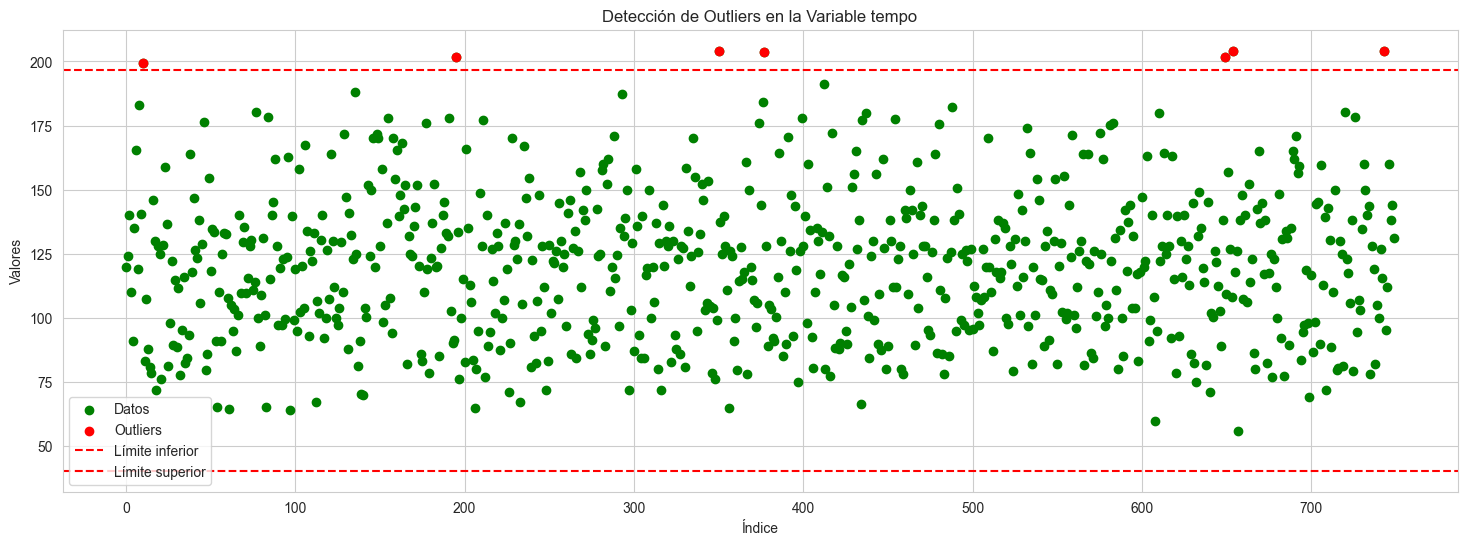

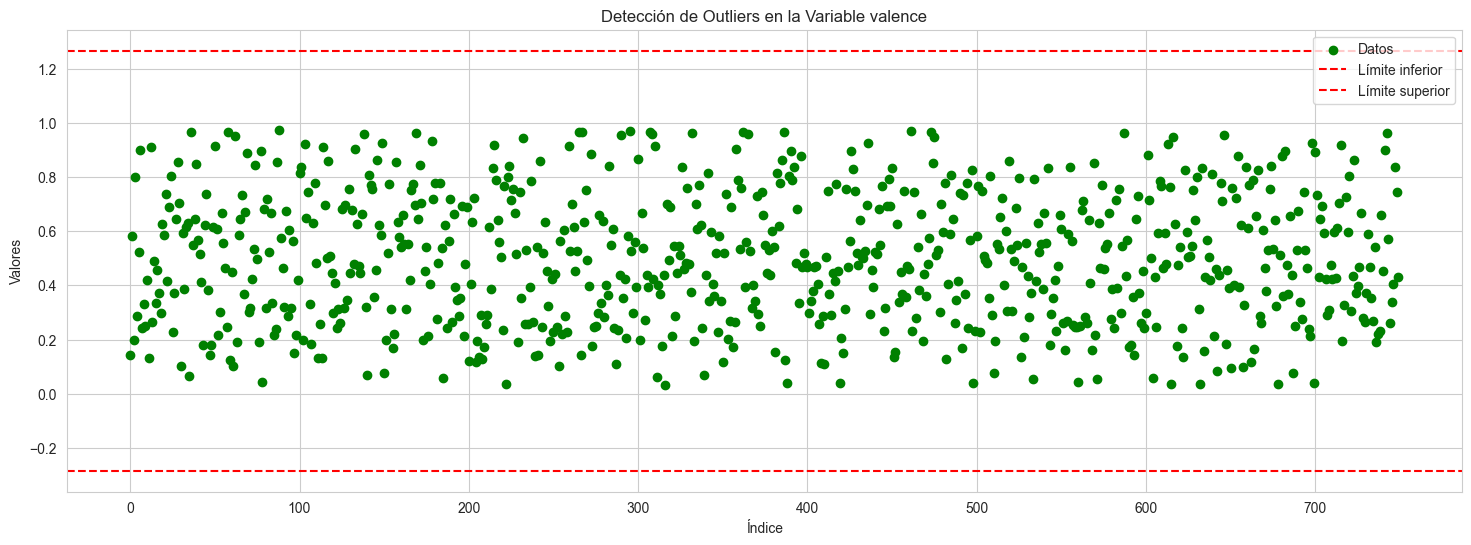

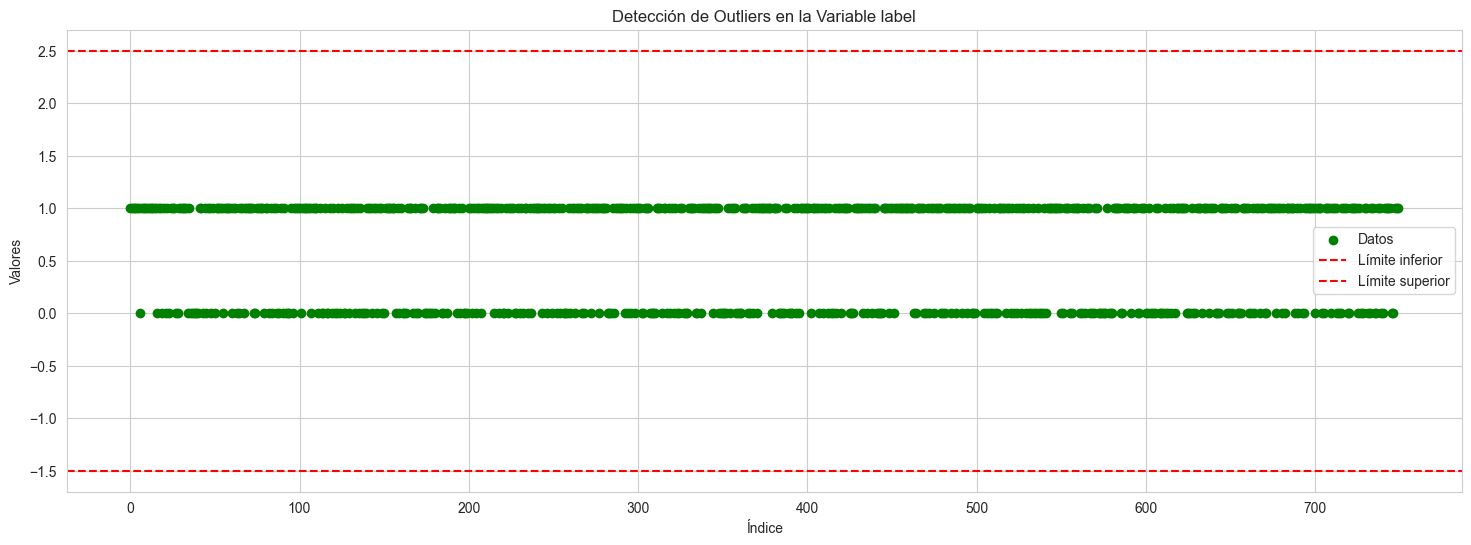

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Excluir las variables del análisis
variables_a_excluir = ['cluster', 'time_signature', 'mode', 'key']
columnas_restantes = [col for col in X_train.columns if col not in variables_a_excluir]

# Iterar sobre cada columna numérica restante
for col in columnas_restantes:
    data = X_train[col].values

    # Calcular percentiles y IQR
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cutoff = iqr * 1.5
    lower, upper = q25 - cutoff, q75 + cutoff

    # Identificar índices de outliers
    outliers_idx = np.argwhere((data < lower) | (data > upper))

    # Graficar datos y outliers
    fig, axes = plt.subplots(1, figsize=(18, 6))
    axes.scatter(np.arange(0, data.shape[0]), data, color='g', label='Datos')
    if len(outliers_idx) > 0:  # Graficar solo si hay outliers
        axes.scatter(outliers_idx, data[outliers_idx], color='r', label='Outliers')
    axes.axhline(lower, color="r", linestyle="--", label='Límite inferior')
    axes.axhline(upper, color="r", linestyle="--", label='Límite superior')
    axes.set_title(f'Detección de Outliers en la Variable {col}')
    axes.set_xlabel('Índice')
    axes.set_ylabel('Valores')
    axes.legend()
    plt.show()


Las variables con outliers según el método de desviación estándar o **Z-Score** son las siguientes:

- **duration**  
- **instrumentalness**  
- **liveness**  
- **loudness**  
- **speechiness**  
- **time_signature**  

#### Verificar Duplicados

Debemos verificar que no tenemos datos duplicados en nuestro dataset

In [125]:


X_train[X_train.duplicated(subset=['duration','danceability', 'energy', 'key', 'speechiness','tempo', 'time_signature', 'valence'],keep=False)]

acousticness  danceability  duration  energy  instrumentalness  key  \
song                                                                        
19        0.992000         0.525    226293  0.0633          0.905000    9   
55        0.046900         0.311    208467  0.3250          0.000000    2   
83        0.137000         0.666    211931  0.9480          0.000000   10   
84        0.046900         0.311    208467  0.3250          0.000000    2   
103       0.586000         0.565    238933  0.4610          0.000000    0   
113       0.992000         0.525    228253  0.0553          0.933000    2   
152       0.586000         0.565    238933  0.4610          0.000000    0   
175       0.025400         0.541    205200  0.8540          0.000125    2   
205       0.002130         0.733    293543  0.5430          0.000169    1   
215       0.166000         0.708    213440  0.6660          0.000229    2   
234       0.992000         0.525    228253  0.0553          0.933000    2   
264       0.025400         0.541    205200  0.8540          0.000125    2   
298       0.992000         0.525    226293  0.0633          0.905000    9   
302       0.586000         0.565    238933  0.4610          0.000000    0   
391       0.182000         0.874    216248  0.7060          0.000000    1   
427       0.182000         0.874    216248  0.7060          0.000000    1   
451       0.166000         0.708    213440  0.6660          0.000229    2   
463       0.849000         0.390    184667  0.3020          0.000191    0   
532       0.000986         0.578    188013  0.8250          0.000000    1   
538       0.137000         0.666    211931  0.9480          0.000000   10   
543       0.166000         0.708    213440  0.6660          0.000229    2   
548       0.849000         0.390    184667  0.3020          0.000191    0   
565       0.000986         0.578    188013  0.8250          0.000000    1   
583       0.005870         0.825    220627  0.8320          0.000789    5   
603       0.005870         0.825    220627  0.8320          0.000789    5   
663       0.002130         0.733    293543  0.5430          0.000169    1   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
song                                                                            
19      0.1050   -23.072     1       0.0497   71.855               4    0.297   
55      0.1390    -9.042     1       0.0283   65.090               1    0.668   
83      0.1920    -2.776     1       0.0638  100.996               4    0.523   
84      0.1390    -9.042     1       0.0283   65.090               1    0.668   
103     0.1620    -7.273     1       0.1410  157.894               4    0.199   
113     0.0934   -22.358     1       0.0633   67.325               4    0.256   
152     0.1620    -7.273     1       0.1410  157.894               4    0.199   
175     0.6510    -6.196     1       0.1550   86.044               4    0.454   
205     0.0703   -10.002     1       0.0445  106.019               4    0.118   
215     0.0929    -7.042     1       0.0349   89.019               4    0.834   
234     0.0934   -22.358     1       0.0633   67.325               4    0.256   
264     0.6510    -6.196     1       0.1550   86.044               4    0.454   
298     0.1050   -23.072     1       0.0497   71.855               4    0.297   
302     0.1620    -7.273     1       0.1410  157.894               4    0.199   
391     0.3340    -5.132     1       0.2070   89.968               4    0.895   
427     0.3340    -5.132     1       0.2070   89.968               4    0.895   
451     0.0929    -7.042     1       0.0349   89.019               4    0.834   
463     0.1220   -10.362     1       0.0379  109.394               3    0.232   
532     0.1760    -6.107     1       0.3220  130.089               4    0.283   
538     0.1920    -2.776     1       0.0638  100.996               4    0.523   
543     0.0929    -7.042     1       0.0349   89.019               

##### En nuestro caso al parecer que tenemos un dataset limpio de duplicados, no encontramos ninguno buscando por todas las columnas 

---

 - ### Categóricas de baja cardinalidad

Reducción de la Dimensionalidad: